## Import Modules

In [25]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import xgboost as xgb

## Loading the dataset

In [2]:
#Load the Boston Housing Dataset from sklearn.datasets and print it

df = pd.read_csv('Boston.csv')
df.drop(columns= 'Unnamed: 0', inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#Get some descriptive statistics

df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
#Datatype info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Preprocessing Data

In [5]:
#Check for null values

df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

## Exploratory Data Analysis

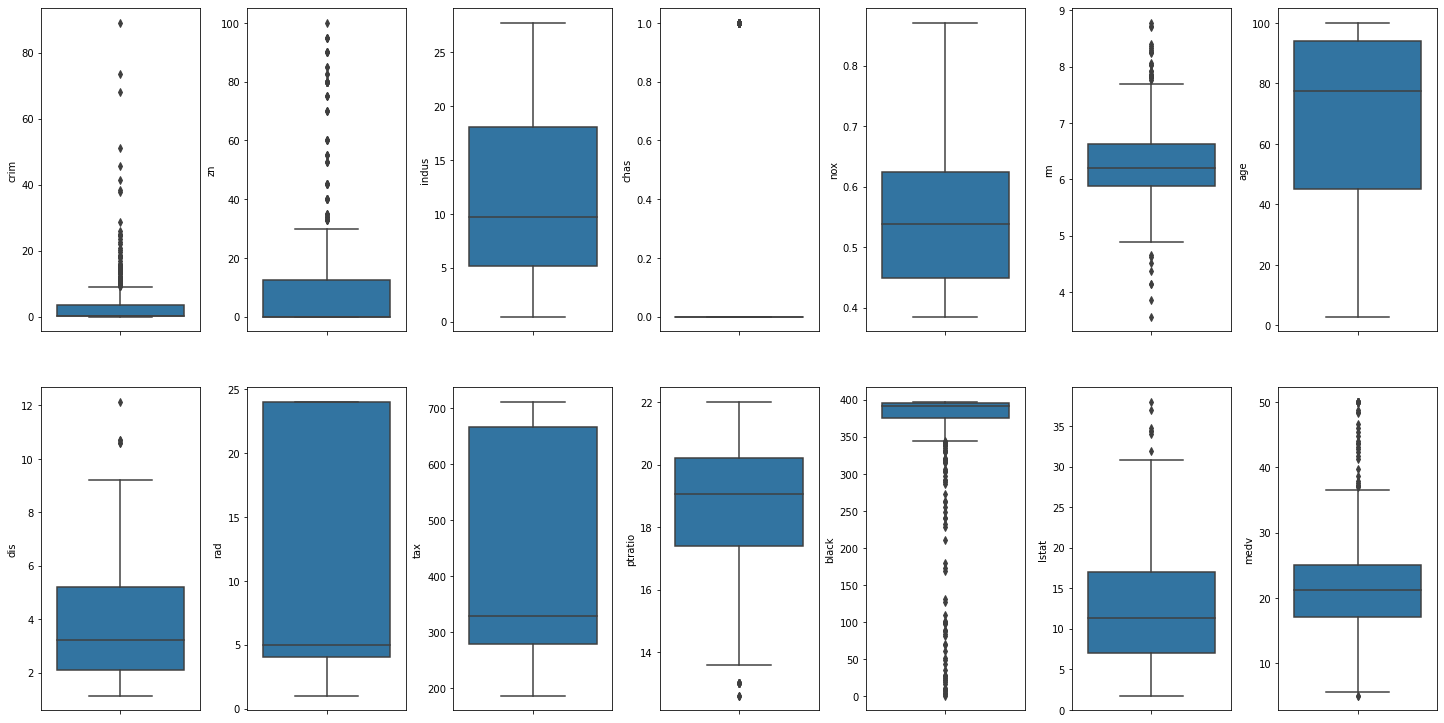

In [6]:
#Create box plots

fig, ax = plt.subplots(ncols= 7, nrows= 2, figsize = (20,10))
index = 0

ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y = col, data = df, ax = ax[index])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad = 0.7, h_pad = 5.0)

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

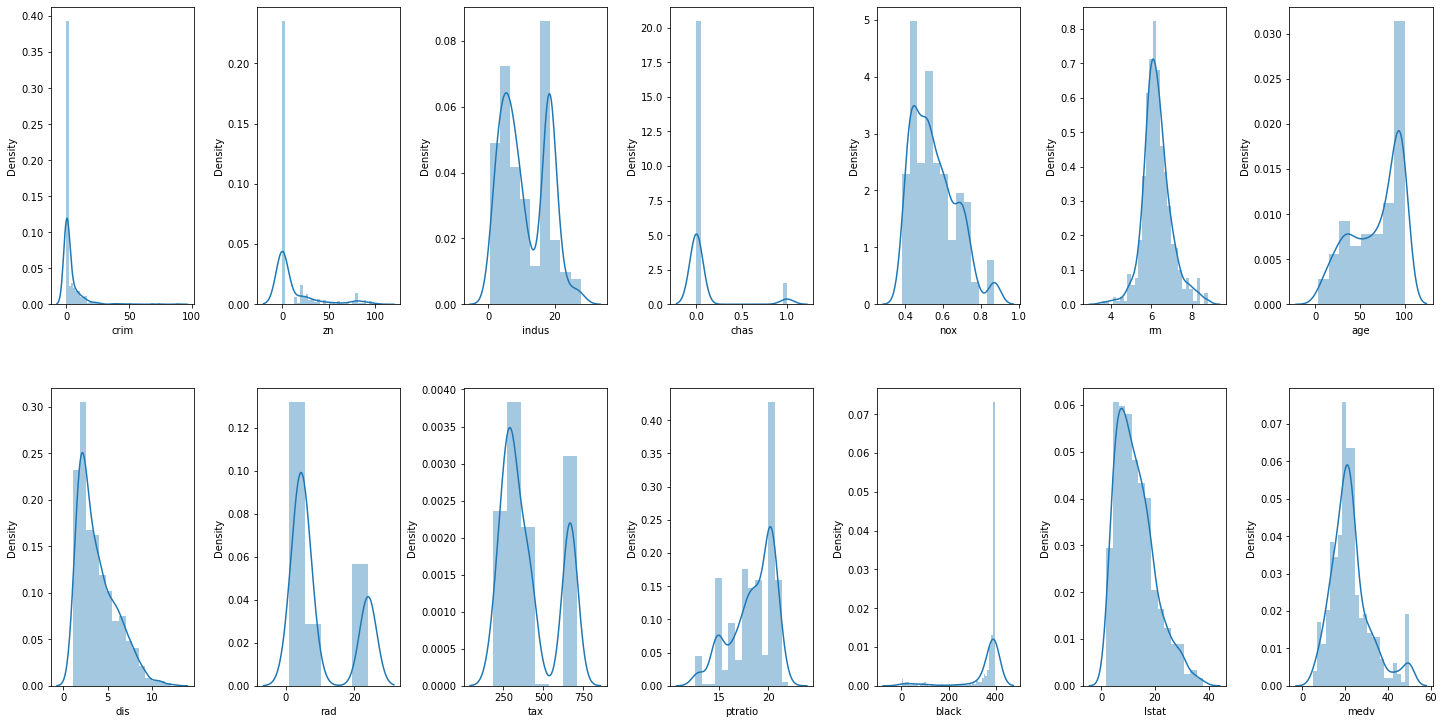

In [7]:
# Create dist plot

fig, ax = plt.subplots(ncols= 7, nrows= 2, figsize = (20,10))
index = 0

ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax = ax[index])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad = 0.7, h_pad = 5.0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Min-Max Normalization

In [9]:
cols = ['crim', 'zn', 'tax', 'black']

for col in cols:
    #find minimum and maximum of that column
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col]-minimum)-(maximum - minimum)    

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

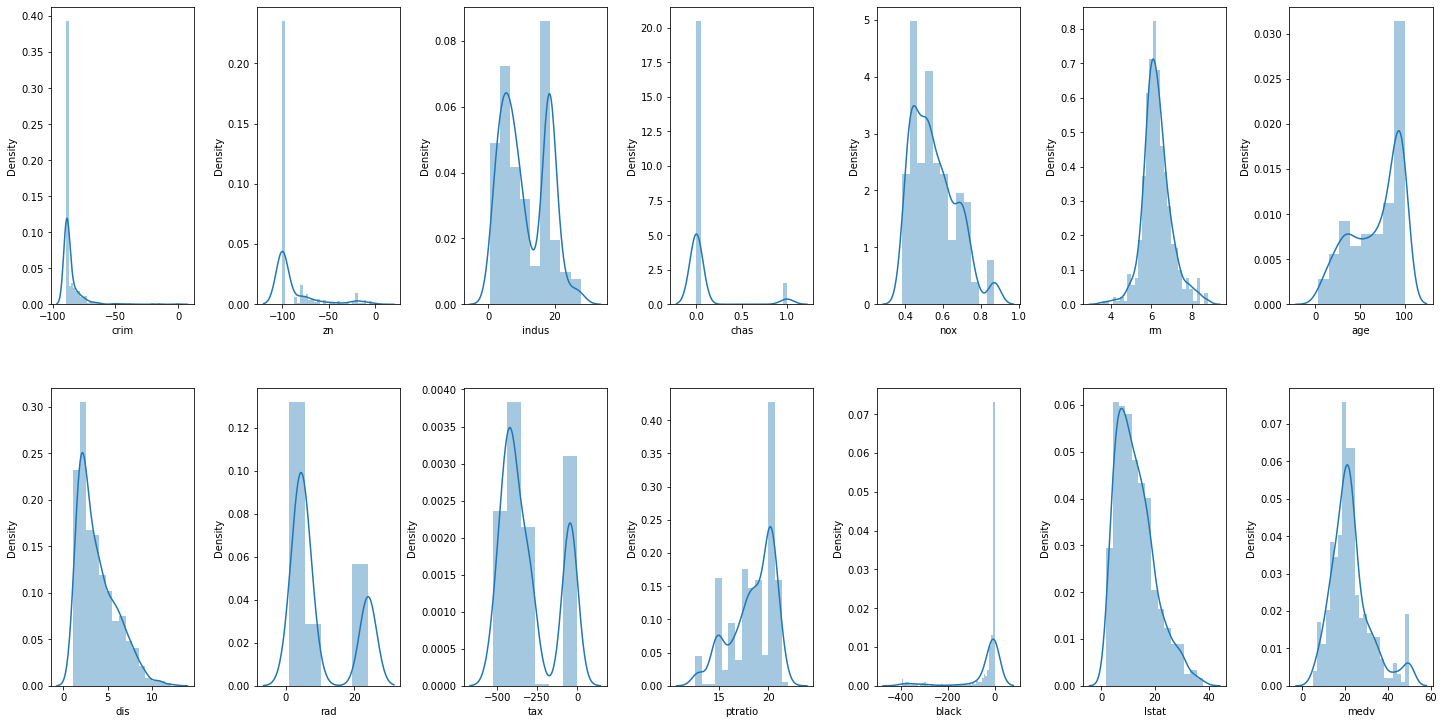

In [10]:
fig, ax = plt.subplots(ncols= 7, nrows= 2, figsize = (20,10))
index = 0

ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax = ax[index])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad = 0.7, h_pad = 5.0)

In [11]:
#Standardization

scalar = preprocessing.StandardScaler()
scaled_cols = scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns= cols)
scaled_cols.head()

,crim,zn,tax,black
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [12]:
for col in cols:
    df[col] = scaled_cols[col]

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

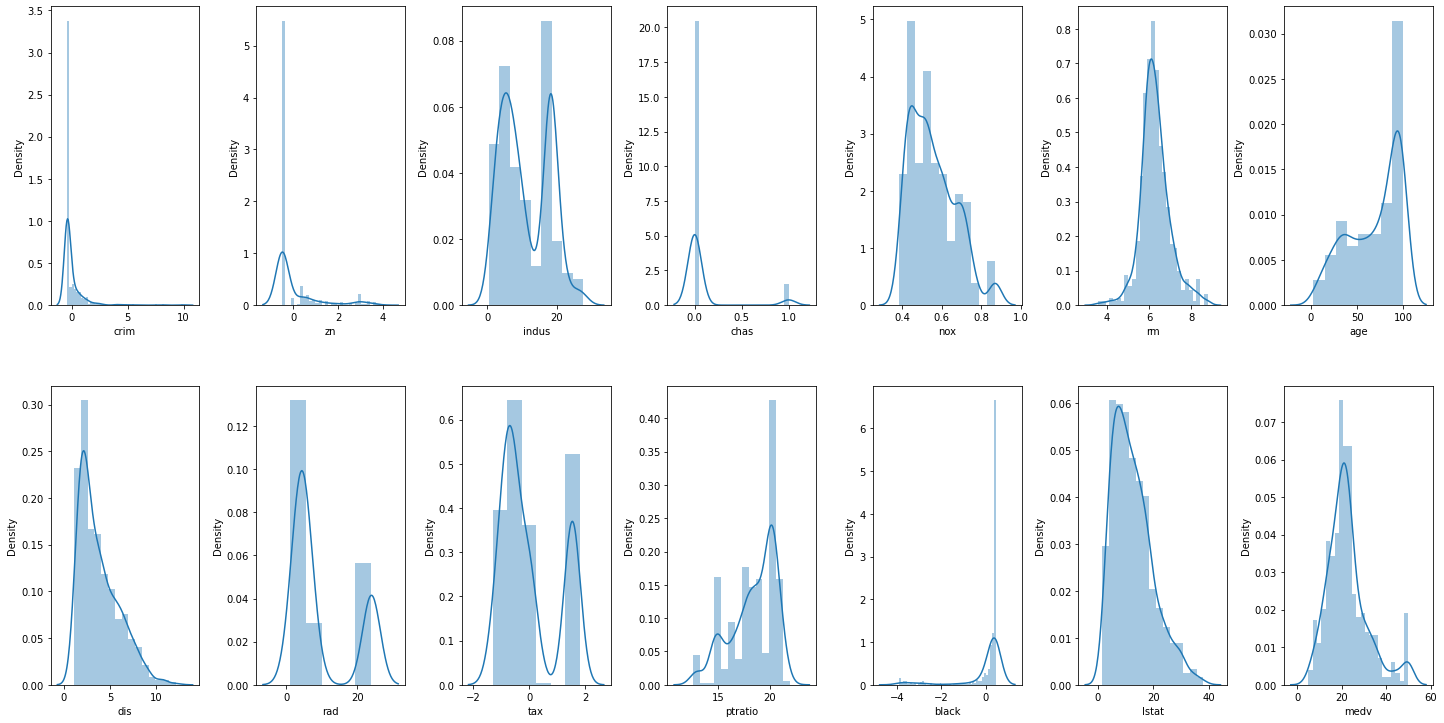

In [13]:
fig, ax = plt.subplots(ncols= 7, nrows= 2, figsize = (20,10))
index = 0

ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax = ax[index])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad = 0.7, h_pad = 5.0)

## Overfitting vs. Underfitting

## Correlation Matrix

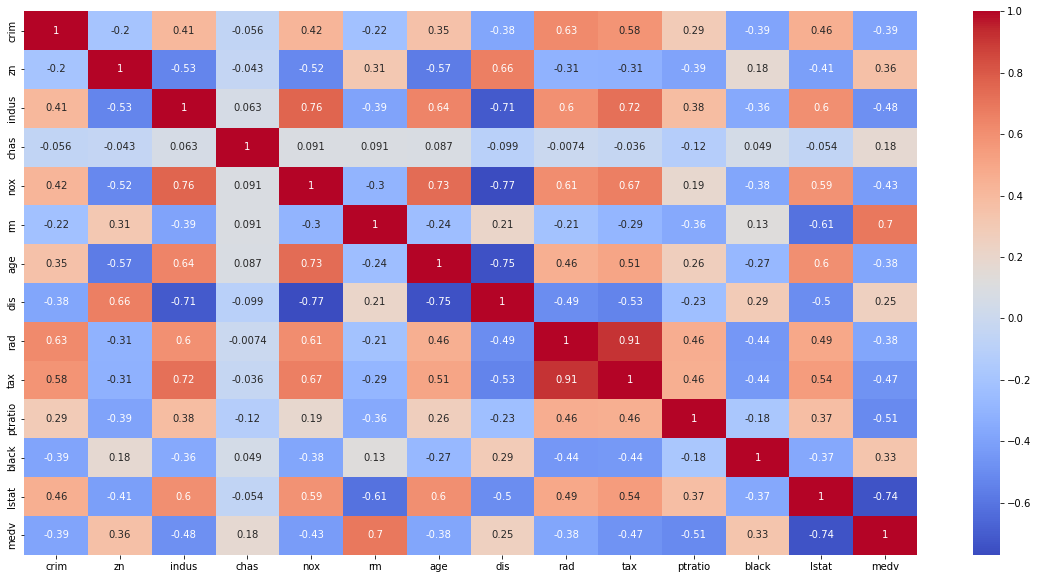

In [14]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap = 'coolwarm');

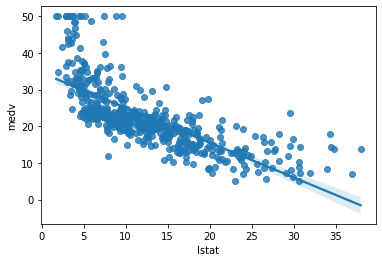

In [15]:
sns.regplot(y=df['medv'], x=df['lstat']);

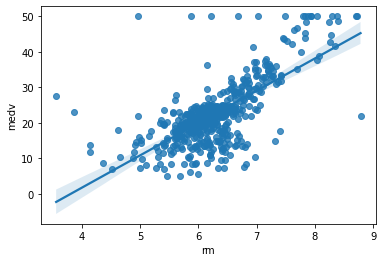

In [16]:
sns.regplot(y=df['medv'], x= df['rm']);

## Input Split

In [17]:
X = df.drop(columns = ['medv', 'rad'], axis=1)
y = df['medv']

## Model Training

In [18]:
def train(model, X, y):
    #Train the model
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(X_train,y_train)
    
    #Predict the training set
    pred = model.predict(X_test)
    
    #Perform cross validation
    cv_score = cross_val_score(model, X, y, scoring = 'neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print('Model Report')
    print('MSE: ', mean_squared_error(y_test,pred))
    print('Cv Score: ', cv_score)

### Linear Regression

Model Report
MSE:  23.871005067364898
Cv Score:  35.58136621076913


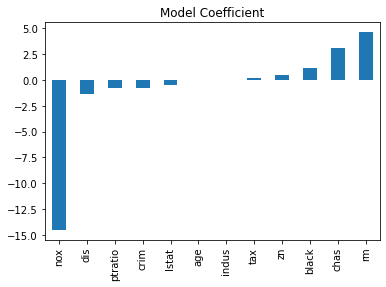

In [19]:
linreg = LinearRegression()
train(linreg, X, y)
coef = pd.Series(linreg.coef_, X.columns).sort_values()
coef.plot(kind='bar', title = 'Model Coefficient');

### Decision Tree Regressor

Model Report
MSE:  12.038425196850394
Cv Score:  35.8595329062318


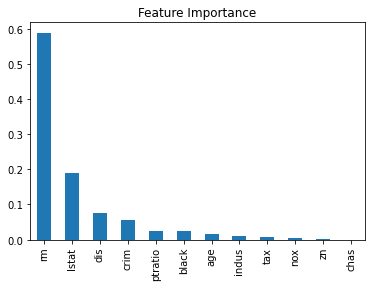

In [20]:
dtreg = DecisionTreeRegressor()

train(dtreg, X,y)
coef = pd.Series(dtreg.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title = 'Feature Importance');

### Random Forest Regressor

Model Report
MSE:  10.490424181102359
Cv Score:  21.605170104290423


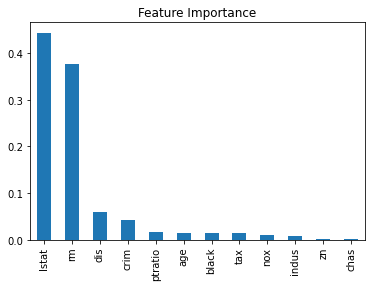

In [21]:
rfreg = RandomForestRegressor()

train(rfreg, X,y)
coef = pd.Series(rfreg.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title = 'Feature Importance');

### Extra Tree Regressor

Model Report
MSE:  11.074950133858268
Cv Score:  19.012746672607246


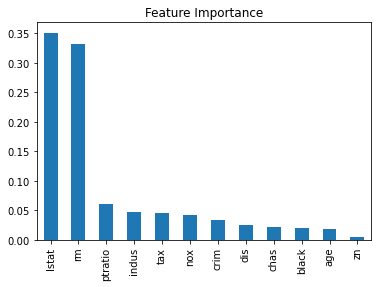

In [22]:
etreg = ExtraTreesRegressor()

train(etreg, X,y)
coef = pd.Series(etreg.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title = 'Feature Importance');

### XGBoost Regressor

C:\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate 

Model Report
MSE:  10.229776363874551
Cv Score:  18.766198044819188


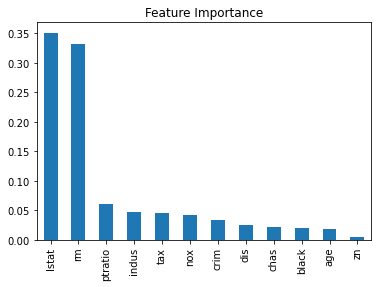

In [26]:
xgboost = xgb.XGBRegressor()

train(xgboost, X, y)
coef = pd.Series(etreg.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title = 'Feature Importance');